# FootballDB Results Analysis

Code to reproduce the figures of **FootballDB: Exploring NL-to-SQL Systems in the Real-World**.

## Load results

In [1]:
RESULT_FOLDER = "../../data/results"
import os
import pandas as pd

dfs = []
for subdir, dirs, files in os.walk(RESULT_FOLDER):
    for file in files:
        if ".csv" in file:
            df = pd.read_csv(os.path.join(subdir, file))
            dfs.append(df)
df_all = pd.concat(dfs)
df_all['id_index'] = df_all['id']
df_all = df_all.set_index('id_index')

In [2]:
df_all.head()

,db_id,id,question,query,hardness,split,label,prediction,system,number_of_joins,...,query_length,number_of_keywords,full_column_match,full_value_match,partial_column_match,question_similarity_train_query_id,similarity_score_nl,sql_similarity_train_query_id,similarity_score_sql,no_tokens
id_index,,,,,,,,,,,,,,,,,,,,,
2,exp_v1,2,Against which team did Switzerland loose in 2018,"SELECT T1.teamname, T3.teamname, T2.home_team_...",extra,100,False,"select t1.teamname, t2.year from national_team...",T5$_{Picard}$,4,...,625,1,0,6,11,600,0.761025,332,0.700800,77
6,exp_v1,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,extra,100,False,select distinct t1.player_name from player as ...,T5$_{Picard}$,1,...,206,2,1,6,11,848,0.679872,310,0.466019,21
11,exp_v1,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,easy,100,True,select count(*) from national_team as t1 where...,T5$_{Picard}$,0,...,68,0,0,4,2,792,0.989651,792,1.000000,10
22,exp_v1,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,extra,100,True,select distinct t1.club_team_name from player_...,T5$_{Picard}$,2,...,182,0,0,0,3,469,0.914928,41,0.931937,26
51,exp_v1,51,Give me all matches where stage is Quarter-fin...,"SELECT m.year, nt.teamname, nt2.teamname, m.ho...",extra,100,False,select t1.teamname from national_team as t1 jo...,T5$_{Picard}$,2,...,276,1,1,1,4,50,0.749127,50,0.789855,34


## Overall Statistics

In [3]:
df_all.describe()

,id,split,number_of_joins,number_of_projections,number_of_filters,number_of_aggregations,number_of_set_operations,number_of_subqueries,run,hardness_numeric,query_length,number_of_keywords,full_column_match,full_value_match,partial_column_match,question_similarity_train_query_id,similarity_score_nl,sql_similarity_train_query_id,similarity_score_sql,no_tokens
count,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.000000,9300.00000,9300.000000,9300.000000
mean,478.720000,69.677419,1.953333,2.036667,2.130000,0.566667,0.120000,0.030000,0.580645,3.100000,233.353871,0.850000,0.480000,2.960000,7.156667,494.330000,0.782927,501.17000,0.795009,33.773656
std,298.651891,94.685670,1.910902,1.286662,1.781416,0.819936,0.324979,0.221597,0.794142,1.053622,156.241934,1.033254,0.650368,2.593413,6.184624,282.705102,0.114466,320.62903,0.154778,22.411405
min,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.489517,23.00000,0.381579,8.000000
25%,211.500000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,139.000000,0.000000,0.000000,0.000000,3.000000,179.000000,0.707716,197.00000,0.671429,20.000000
50%,491.500000,20.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,186.000000,0.500000,0.000000,3.500000,5.500000,526.500000,0.777947,490.00000,0.788584,26.000000
75%,673.750000,100.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,4.000000,285.000000,2.000000,1.000000,4.000000,10.000000,728.250000,0.872010,792.00000,0.947264,39.000000
max,1075.000000,300.000000,10.000000,9.000000,9.000000,3.000000,1.000000,2.000000,2.000000,5.000000,831.000000,5.000000,3.000000,9.000000,41.000000,1074.000000,0.989651,1074.00000,1.000000,115.000000


In [4]:
overall_counts = df_all[(df_all["split"]==300) | (df_all["split"]==30)].groupby(["hardness"])["label"].count()
overall_counts

hardness
easy       252
extra     1215
hard       702
medium     531
Name: label, dtype: int64

In [5]:
true_counts = df_all[((df_all["split"]==300) | (df_all["split"]==30)) & (df_all["label"]==True)].groupby(["hardness"])["label"].count()
true_counts

hardness
easy      168
extra     238
hard      232
medium    286
Name: label, dtype: int64

In [6]:
hardness_accuracy = (true_counts/overall_counts)
hardness_accuracy

hardness
easy      0.666667
extra     0.195885
hard      0.330484
medium    0.538606
Name: label, dtype: float64

In [7]:
df_all[df_all["db_id"]=="exp_v2"]["number_of_joins"].mean()

2.63

In [8]:
overall_counts = df_all.groupby(["db_id", "split", "hardness"])["label"].count()
overall_counts

db_id   split  hardness
exp_v1  0      easy         40
               extra       184
               hard         92
               medium       84
        10     easy         60
                          ... 
exp_v3  200    medium       57
        300    easy         24
               extra       111
               hard        108
               medium       57
Name: label, Length: 84, dtype: int64

In [9]:
true_counts = df_all[df_all["label"]==True].groupby(["db_id", "split", "hardness"])["label"].count()
true_counts

db_id   split  hardness
exp_v1  0      easy        21
               extra       10
               hard        11
               medium      19
        10     easy        42
                           ..
exp_v3  200    medium      21
        300    easy        15
               extra       16
               hard        27
               medium      18
Name: label, Length: 84, dtype: int64

In [10]:
hardness_accuracy = (true_counts/overall_counts)
hardness_accuracy

db_id   split  hardness
exp_v1  0      easy        0.525000
               extra       0.054348
               hard        0.119565
               medium      0.226190
        10     easy        0.700000
                             ...   
exp_v3  200    medium      0.368421
        300    easy        0.625000
               extra       0.144144
               hard        0.250000
               medium      0.315789
Name: label, Length: 84, dtype: float64

In [11]:
def count_token(row):
    return len([v for v in row["query"].split(" ") if v !=""])

In [12]:
df_all["no_tokens"] = df_all.apply(count_token, axis=1)

In [13]:
df_all["no_tokens"].mean()

33.773655913978494

## Plots

In [14]:
from plotting import plot

# nicer names
renames = {"GPT_SC": r"GPT-3.5$_{s+c}$", "GPT_S": r"GPT-3.5$_{s}$", "T5-Picard":"T5$_{Picard}$"}
df_all = df_all.replace({"system": renames})

# queries that cannot be classified by Spider parser
df_all = df_all.replace({"hardness": {"extreme": "extra"}})
df_all["hardness"].unique()

array(['extra', 'easy', 'medium', 'hard'], dtype=object)

### Spider Hardness vs. Execution Accuracy

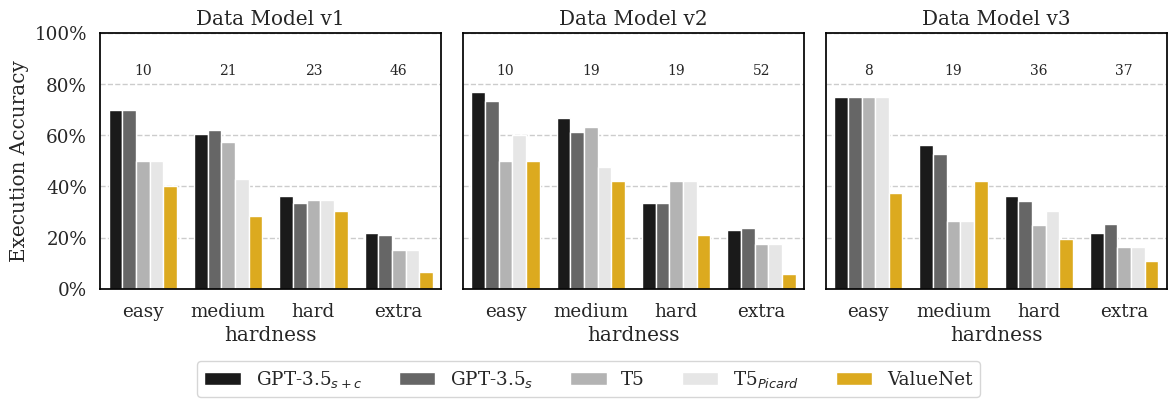

In [15]:
plot.plot_bars_counts(df_all[(df_all["split"]==300) | (df_all["split"]==30)], x="hardness", hue="system", system = "",
                 order=["easy", "medium", "hard", "extra"])

### Query Characteristics vs. Execution Accuracy

In [16]:
def binarize(column):
    return (column > 0).astype(int)

def categorize_joins(column):
    return column.apply(lambda x: 0 if x == 0 else (1 if x == 1 else 2))

def zero_component(column):
    return column.apply(lambda x: 1 if x == 0 else 0)

def one_component(column):
    return column.apply(lambda x: 1 if x == 1 else 0)
    
def one_and_more_component(column):
    return column.apply(lambda x: 1 if x >= 1 else 0)


def two_and_more_component(column):
    return column.apply(lambda x: 1 if x >= 2 else 0)


df_all[r'$\geq 1$ agg'] = binarize(df_all['number_of_aggregations'])
df_all[r'$\geq 1$ set'] = binarize(df_all['number_of_set_operations'])
df_all[r'$\geq 1$ subquery'] = binarize(df_all['number_of_subqueries'])
df_all[r'$1$ join'] = one_component(df_all['number_of_joins'])
df_all[r'$\geq 2$ join'] = two_and_more_component(df_all['number_of_joins'])
df_all[r'$1$ project'] = one_component(df_all['number_of_projections'])
df_all[r'$\geq 2$ project'] = two_and_more_component(df_all['number_of_projections'])

df_all[r'$1$ filter'] = one_component(df_all['number_of_filters'])
df_all[r'$\geq 2$ filter'] = two_and_more_component(df_all['number_of_filters'])


In [17]:
df_qc = df_all[["system", "db_id", "split", "id", "question", "query", "label",
                  r'$\geq 1$ agg', r'$\geq 1$ set',
                  # r'$\geq 1$ subquery',
                  r'$1$ join', r'$\geq 2$ join',
                 r'$1$ project', r'$\geq 2$ project', r'$1$ filter', r'$\geq 2$ filter'
                 ]]
df_qc.head()

,system,db_id,split,id,question,query,label,$\geq 1$ agg,$\geq 1$ set,$1$ join,$\geq 2$ join,$1$ project,$\geq 2$ project,$1$ filter,$\geq 2$ filter
id_index,,,,,,,,,,,,,,,
2,T5$_{Picard}$,exp_v1,100,2,Against which team did Switzerland loose in 2018,"SELECT T1.teamname, T3.teamname, T2.home_team_...",False,0,1,0,1,0,1,0,1
6,T5$_{Picard}$,exp_v1,100,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,False,0,0,1,0,1,0,0,1
11,T5$_{Picard}$,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,1,0,0,0,1,0,1,0
22,T5$_{Picard}$,exp_v1,100,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,True,0,0,0,1,1,0,1,0
51,T5$_{Picard}$,exp_v1,100,51,Give me all matches where stage is Quarter-fin...,"SELECT m.year, nt.teamname, nt2.teamname, m.ho...",False,0,0,0,1,0,1,0,1


In [18]:
df_qc_melt = df_qc.melt(id_vars=["system", "db_id", "split", "id", "question", "query", "label"],
                       value_vars=[
                  r'$\geq 1$ agg', r'$\geq 1$ set',
                           # r'$\geq 1$ subquery',
                           r'$1$ join', r'$\geq 2$ join',
                 r'$1$ project', r'$\geq 2$ project', r'$1$ filter', r'$\geq 2$ filter'
                       ],
                       var_name="Query Characteristic")
df_qc_melt = df_qc_melt.drop(df_qc_melt[df_qc_melt.value == 0].index)
df_qc_melt.head()

,system,db_id,split,id,question,query,label,Query Characteristic,value
2,T5$_{Picard}$,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,$\geq 1$ agg,1
6,T5$_{Picard}$,exp_v1,100,94,How many games did Brazil win?,SELECT count(*)\nFROM national_team AS T1\n ...,False,$\geq 1$ agg,1
7,T5$_{Picard}$,exp_v1,100,104,How many goals did each player score over all ...,"select nt.teamname, p.player_name, count(*)\n ...",False,$\geq 1$ agg,1
9,T5$_{Picard}$,exp_v1,100,120,How many goals did Ronaldo Score?,"SELECT T2.player_name, count(*) FROM match_fac...",False,$\geq 1$ agg,1
10,T5$_{Picard}$,exp_v1,100,122,How many goals did switzerland score in 2018,select sum(t.g)\nfrom\n (select sum(T2.away...,False,$\geq 1$ agg,1


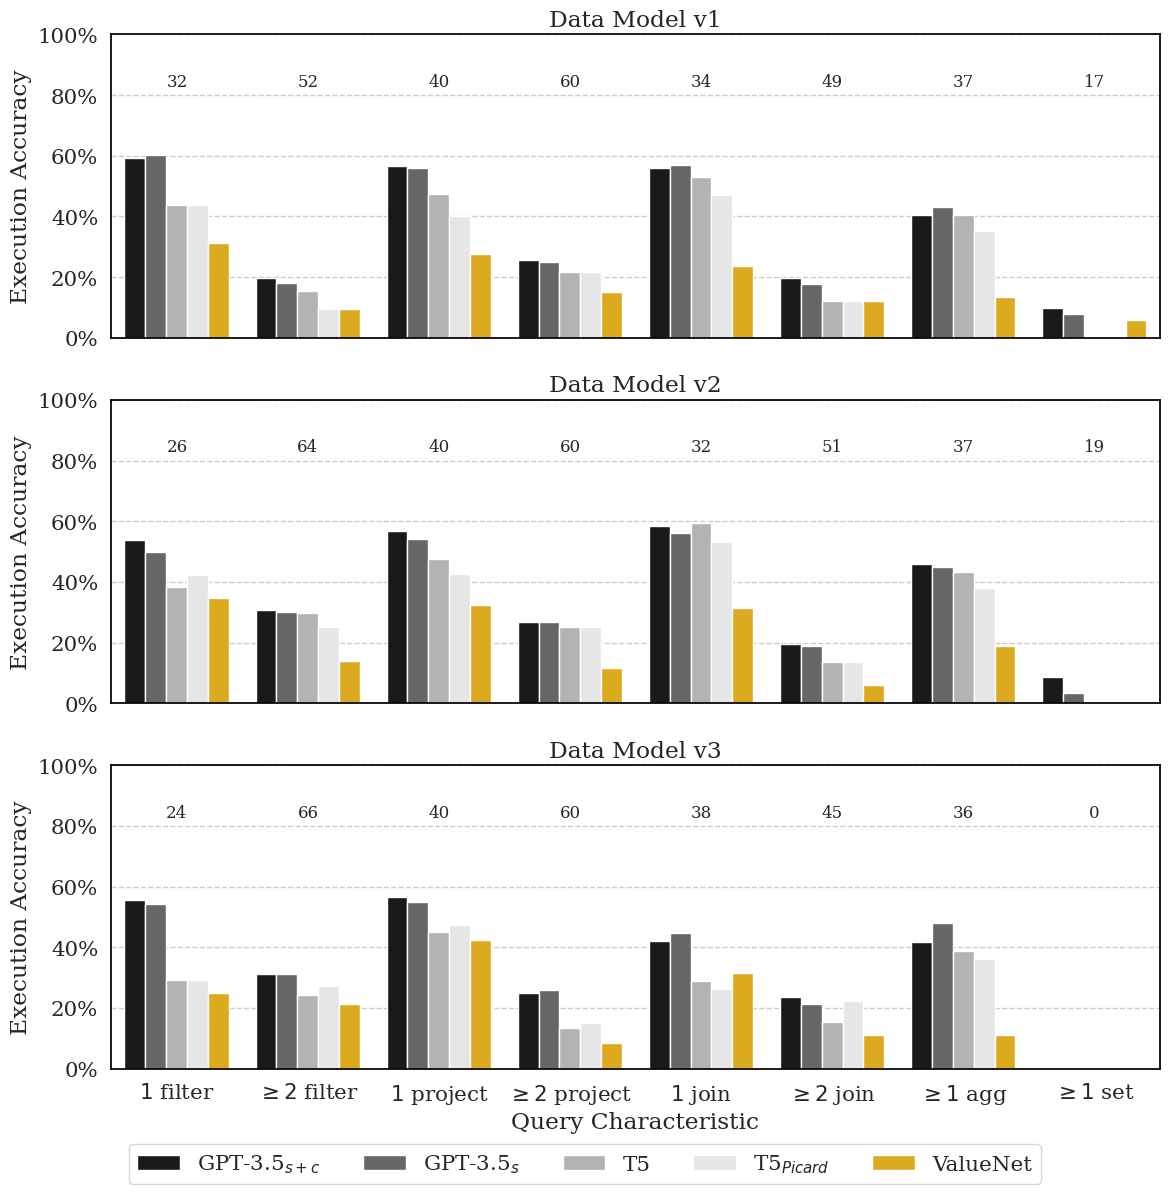

In [19]:
order = [
    r'$1$ filter',
    r'$\geq 2$ filter',
    r'$1$ project',
    r'$\geq 2$ project',
    r'$1$ join',
    r'$\geq 2$ join',
    r'$\geq 1$ agg',
    r'$\geq 1$ set',
]

plot.plot_bars_vertical(df_qc_melt[((df_qc_melt["split"]==300) | (df_qc_melt["split"]==30))],
                x="Query Characteristic", hue="system", system = "", order=order,
               filename="sql-query-characteristic-without-subquery-300-all-data-models")


### NL-SQL overlap based on SQL keywords (KW) and full columns or value matches 

In [20]:
df_all[r'$0$ KW'] = zero_component(df_all['number_of_keywords'])
# df_all[r'$1$ number_of_keywords'] = one_component(df_all['number_of_keywords'])
# df_all[r'$\geq 2$ number_of_keywords'] = two_component(df_all['number_of_keywords'])
df_all[r'$\geq 1$ KW'] = one_and_more_component(df_all['number_of_keywords'])


df_all[r'$0$ column'] = zero_component(df_all['full_column_match'])
# df_all[r'$1$ full_column_match'] = one_component(df_all['full_column_match'])
# df_all[r'$\geq 2$ full_column_match'] = two_component(df_all['full_column_match'])
df_all[r'$\geq 1$ column'] = one_and_more_component(df_all['full_column_match'])


df_all[r'$0$ value'] = zero_component(df_all['full_value_match'])
# df_all[r'$1$ full_value_match'] = one_component(df_all['full_value_match'])
# df_all[r'$\geq 2$ full_value_match'] = two_component(df_all['full_value_match'])
df_all[r'$\geq 1$ value'] = one_and_more_component(df_all['full_value_match'])


# df_all[r'$0$ col$_{partial}$'] = zero_component(df_all['partial_column_match'])
# df_all[r'$1$ partial_column_match'] = one_component(df_all['partial_column_match'])
# df_all[r'$\geq 2$ partial_column_match'] = two_component(df_all['partial_column_match'])
# df_all[r'$\geq 1$ col$_{partial}$'] = one_and_more_component(df_all['partial_column_match'])



                  # r'$0$ KW', r'$\geq 1$ KW',
                  # r'$0$ column', r'$\geq 1$ column',
                  # r'$0$ value', r'$\geq 1$ value',


In [21]:
df_nl_complexity = df_all[["system", "db_id", "split", "id", "question", "query", "label",
                  # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
                  # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
                  # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
                  # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$0$ KW', r'$\geq 1$ KW',
                  r'$0$ column', r'$\geq 1$ column',
                  r'$0$ value', r'$\geq 1$ value',
                  # r'$0$ col$_{partial}$', r'$\geq 1$ col$_{partial}$',
                           
                 ]]
df_nl_complexity.head()

,system,db_id,split,id,question,query,label,$0$ KW,$\geq 1$ KW,$0$ column,$\geq 1$ column,$0$ value,$\geq 1$ value
id_index,,,,,,,,,,,,,
2,T5$_{Picard}$,exp_v1,100,2,Against which team did Switzerland loose in 2018,"SELECT T1.teamname, T3.teamname, T2.home_team_...",False,0,1,1,0,0,1
6,T5$_{Picard}$,exp_v1,100,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,False,0,1,0,1,0,1
11,T5$_{Picard}$,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,1,0,1,0,0,1
22,T5$_{Picard}$,exp_v1,100,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,True,1,0,1,0,1,0
51,T5$_{Picard}$,exp_v1,100,51,Give me all matches where stage is Quarter-fin...,"SELECT m.year, nt.teamname, nt2.teamname, m.ho...",False,0,1,0,1,0,1


In [22]:
df_nl_complexity_melt = df_nl_complexity.melt(
    id_vars=["system", "db_id", "split", "id", "question", "query", "label"],
    value_vars=[
                  # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
                  # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
                  # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
                  # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$0$ KW', r'$\geq 1$ KW',
                  r'$0$ column', r'$\geq 1$ column',
                  r'$0$ value', r'$\geq 1$ value',
                  # r'$0$ col$_{partial}$', r'$\geq 1$ col$_{partial}$',
        
                ],
                var_name="NL Characteristic")
df_nl_complexity_melt = df_nl_complexity_melt.drop(df_nl_complexity_melt[df_nl_complexity_melt.value == 0].index)
df_nl_complexity_melt.head()


,system,db_id,split,id,question,query,label,NL Characteristic,value
2,T5$_{Picard}$,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,$0$ KW,1
3,T5$_{Picard}$,exp_v1,100,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,True,$0$ KW,1
5,T5$_{Picard}$,exp_v1,100,89,Give me the year of the first world cup played.,select t1.year from world_cup as t1 order by t...,True,$0$ KW,1
6,T5$_{Picard}$,exp_v1,100,94,How many games did Brazil win?,SELECT count(*)\nFROM national_team AS T1\n ...,False,$0$ KW,1
8,T5$_{Picard}$,exp_v1,100,108,How many Goals did Germany score against Brazil?,"SELECT T3.year, T2.away_team_goals\n FROM nati...",False,$0$ KW,1


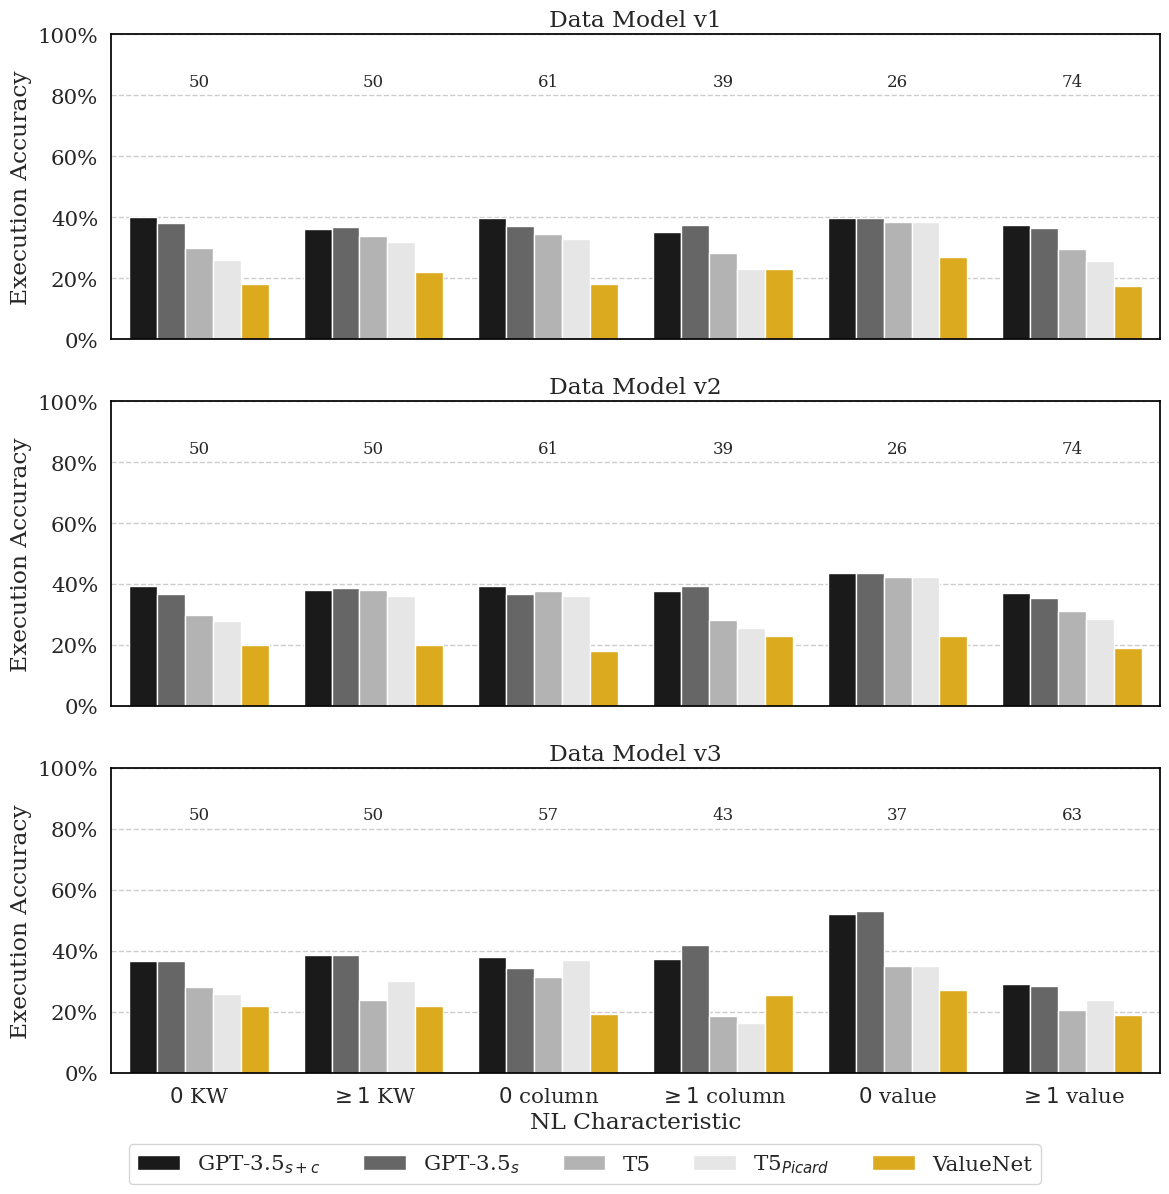

In [23]:
order = [
      # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
      # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
      # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
      # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$0$ KW', r'$\geq 1$ KW',
                  r'$0$ column', r'$\geq 1$ column',
                  r'$0$ value', r'$\geq 1$ value',
                  # r'$0$ col$_{partial}$', r'$\geq 1$ col$_{partial}$',
]
plot.plot_bars_vertical(df_nl_complexity_melt[((df_nl_complexity_melt["split"]==300) | (df_nl_complexity_melt["split"]==30))],
                x="NL Characteristic", hue="system", system = "", order=order,
               filename="nl-characteristic-300-all-data-models", figsize=(12,12), rotation=0)


### Train-Test Similarity

In [24]:
def lower_25(column):
    t = column.describe().loc["25%"]
    return column.apply(lambda x: 1 if x <= t else 0)

def upper_25(column):
    t = column.describe().loc["75%"]
    return column.apply(lambda x: 1 if x >= t else 0)

In [25]:
df_all[r'$\leq$ 25th %ile NL']  = lower_25(df_all['similarity_score_nl'])
df_all[r'$\geq$ 75th %ile NL']  = upper_25(df_all['similarity_score_nl'])


df_all[r'$\leq$ 25th %ile SQL']  = lower_25(df_all['similarity_score_sql'])
df_all[r'$\geq$ 75th %ile SQL']  = upper_25(df_all['similarity_score_sql'])


In [26]:
df_similarity = df_all[["system", "db_id", "split", "id", "question", "query", "label",
                  # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
                  # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
                  # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
                  # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$\leq$ 25th %ile NL', r'$\geq$ 75th %ile NL',
                  r'$\leq$ 25th %ile SQL', r'$\geq$ 75th %ile SQL',
                           
                 ]]
df_similarity.head()

,system,db_id,split,id,question,query,label,$\leq$ 25th %ile NL,$\geq$ 75th %ile NL,$\leq$ 25th %ile SQL,$\geq$ 75th %ile SQL
id_index,,,,,,,,,,,
2,T5$_{Picard}$,exp_v1,100,2,Against which team did Switzerland loose in 2018,"SELECT T1.teamname, T3.teamname, T2.home_team_...",False,0,0,0,0
6,T5$_{Picard}$,exp_v1,100,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,False,1,0,1,0
11,T5$_{Picard}$,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,0,1,0,1
22,T5$_{Picard}$,exp_v1,100,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,True,0,1,0,0
51,T5$_{Picard}$,exp_v1,100,51,Give me all matches where stage is Quarter-fin...,"SELECT m.year, nt.teamname, nt2.teamname, m.ho...",False,0,0,0,0


In [27]:
df_similarity_melt = df_similarity.melt(
    id_vars=["system", "db_id", "split", "id", "question", "query", "label"],
    value_vars=[
                  # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
                  # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
                  # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
                  # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$\leq$ 25th %ile NL', r'$\geq$ 75th %ile NL',
                  r'$\leq$ 25th %ile SQL', r'$\geq$ 75th %ile SQL',
        
                ],
                var_name="Similarity")
df_similarity_melt = df_similarity_melt.drop(df_similarity_melt[df_similarity_melt.value == 0].index)
df_similarity_melt.head()


,system,db_id,split,id,question,query,label,Similarity,value
1,T5$_{Picard}$,exp_v1,100,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,False,$\leq$ 25th %ile NL,1
15,T5$_{Picard}$,exp_v1,100,144,How many players have played so far?,SELECT count(distinct p.player_id) from player...,False,$\leq$ 25th %ile NL,1
22,T5$_{Picard}$,exp_v1,100,184,In which country were the least amounts of gam...,"select s.country, count(*)\r\n from stadium as...",True,$\leq$ 25th %ile NL,1
23,T5$_{Picard}$,exp_v1,100,186,In which coutry is A.C. Milan playing?,select c.country from club as c where c.club_n...,False,$\leq$ 25th %ile NL,1
25,T5$_{Picard}$,exp_v1,100,214,List all clubs from Switzerland that were foun...,select * from club as c where c.country = 'Swi...,False,$\leq$ 25th %ile NL,1


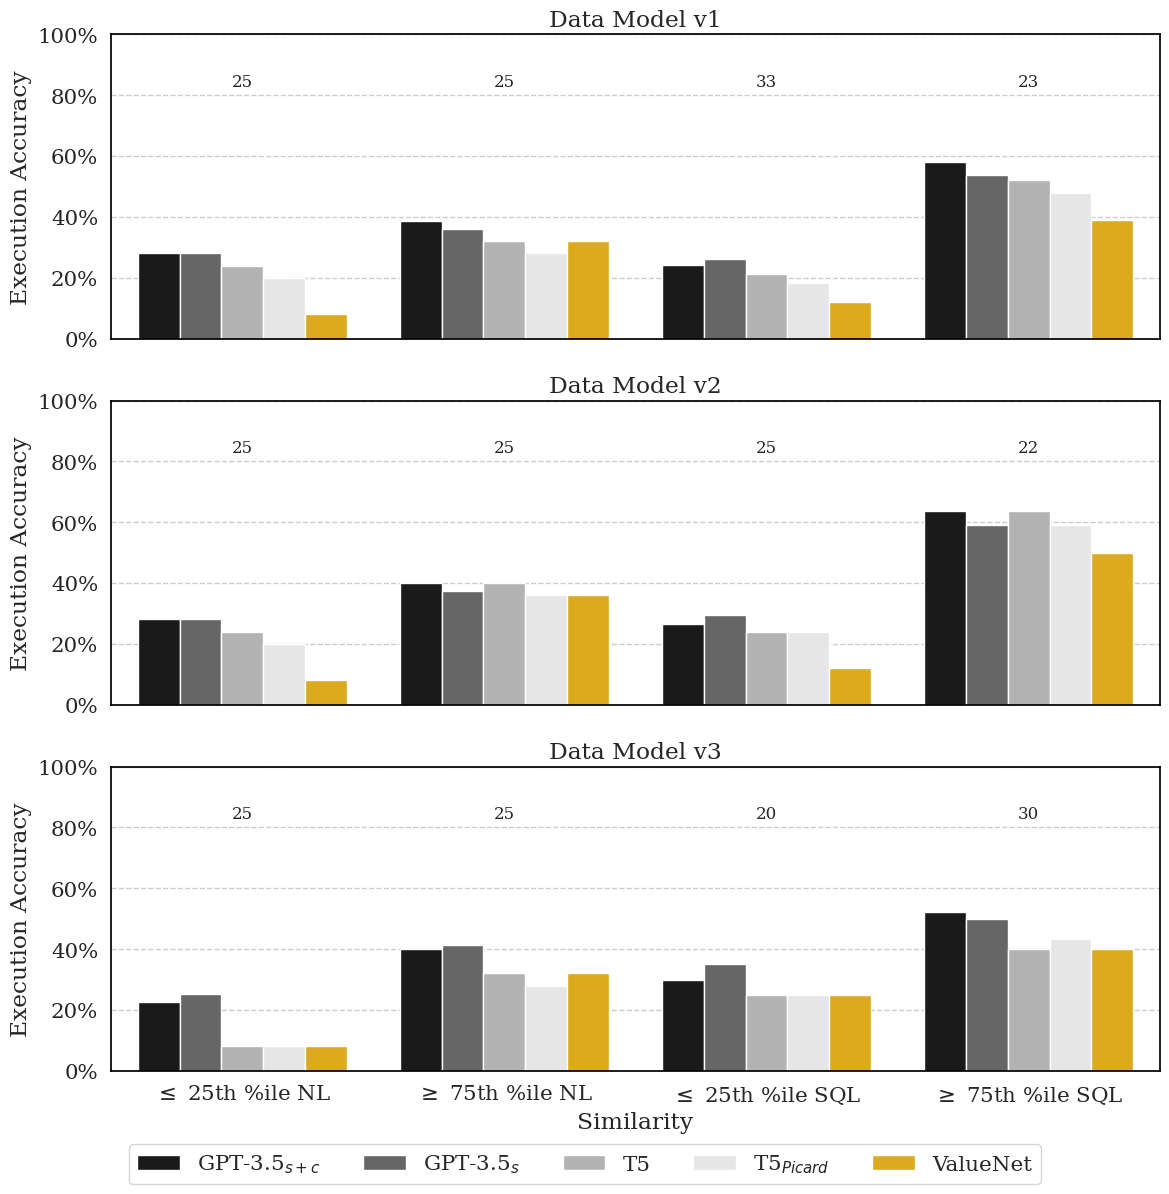

In [28]:
order = [
  r'$\leq$ 25th %ile NL', r'$\geq$ 75th %ile NL',
  r'$\leq$ 25th %ile SQL', r'$\geq$ 75th %ile SQL',
]
plot.plot_bars_vertical(df_similarity_melt[((df_similarity_melt["split"]==300) | (df_similarity_melt["split"]==30))],
                x="Similarity", hue="system", system = "", order=order,
               filename="nl-characteristic-300-all-data-models", figsize=(12,12), rotation=0)


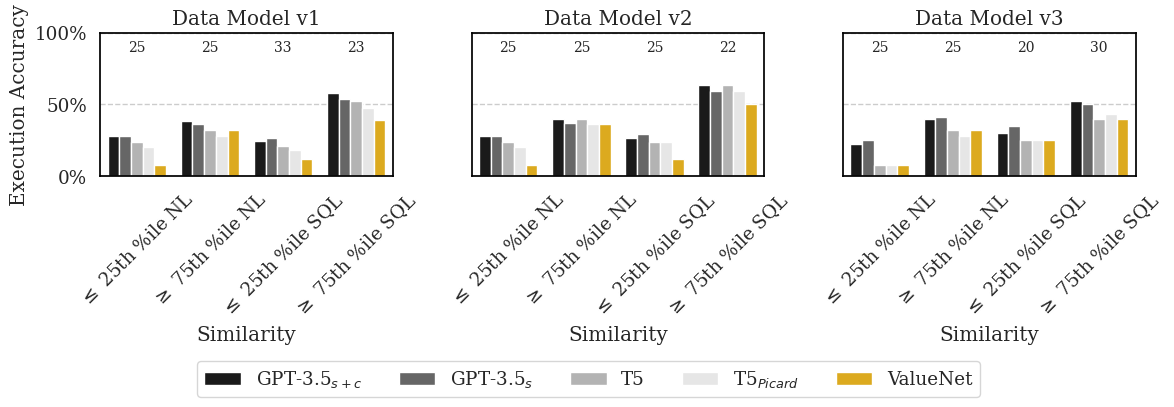

In [29]:
plot.plot_bars_counts(df_similarity_melt[((df_similarity_melt["split"]==300) | (df_similarity_melt["split"]==30))],
                x="Similarity", hue="system", system = "", order=order, rotation=45)